In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_new_fall = pd.read_csv('falldetection.csv')
data_new.replace('#VALUE!', 0, inplace=True)
data_new['TimeStamps'] = pd.to_datetime(data_new['TimeStamps'])
data_new['TimeStamps_int64'] = data_new['TimeStamps'].astype('int64')
data = data_new.drop(columns=['TimeStamps'])
data.dropna(inplace=True)


In [3]:
import pandas as pd
unique_values = data['Activity'].unique()
print(unique_values)
value_counts = data['Activity'].value_counts()
print(value_counts)


[1 0]
Activity
1    2832
0     167
Name: count, dtype: int64


In [4]:
import pandas as pd

# Identify unique values and their counts
value_counts = data['Activity'].value_counts()

# Determine target count (e.g., the minimum count among all unique values)
target_count = value_counts.min()

# Downsample each unique value to match the target count
downsampled_data = pd.DataFrame()
for value in value_counts.index:
    value_data = data[data['Activity'] == value]
    downsampled_value_data = value_data.sample(n=target_count, random_state=42)
    downsampled_data = pd.concat([downsampled_data, downsampled_value_data])

    print(downsampled_data)

# Save or use the downsampled_data for further analysis

      AnkleAccelerometer_x-axis (g)  AnkleAccelerometer_y-axis (g)  \
2727                         -0.276                          0.971   
2778                         -0.284                          0.955   
1146                         -1.040                          0.221   
1110                         -0.213                         -0.970   
196                          -1.021                          0.140   
...                             ...                            ...   
676                          -0.075                         -1.001   
2731                         -0.285                          0.960   
1889                          0.030                         -0.348   
2283                         -1.020                          0.124   
1743                         -0.134                         -0.648   

      AnkleAccelerometer_z-axis (g)    SVM(n)   Theta(n)  \
2727                          0.153  1.020993  71.996057   
2778                          0.166  1.

In [5]:
import pandas as pd

df=downsampled_data

# Assuming you have a DataFrame named df and you want to find unique values in a column named 'column_name'
unique_values = df['Activity'].unique()

print(unique_values)

value_counts = df['Activity'].value_counts()

print(value_counts)

[1 0]
Activity
1    167
0    167
Name: count, dtype: int64


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)
# Or fill missing values with mean, median, or mode
df.fillna(df.mean(), inplace=True)


null_counts=data.isnull().sum()
print(null_counts)

AnkleAccelerometer_x-axis (g)                0
AnkleAccelerometer_y-axis (g)                0
AnkleAccelerometer_z-axis (g)                0
SVM(n)                                       0
Theta(n)                                     0
AnkleAngularVelocity_x-axis (deg/s)          0
AnkleAngularVelocity_y-axis (deg/s)          0
AnkleAngularVelocity_z-axis (deg/s)          0
Ankleluminosity                              0
RightPocketAccelerometer_x-axis (g)          0
RightPocketAccelerometer_y-axis (g)          0
RightPocketAccelerometer_z-axis (g)          0
RightPocketAngularVelocity_x-axis (deg/s)    0
RightPocketAngularVelocity_y-axis (deg/s)    0
RightPocketAngularVelocity_z-axis (deg/s)    0
NeckLuminosity                               0
BeltAccelerometer_x-axis (g)                 0
BeltAccelerometer_y-axis (g)                 0
BeltAccelerometer_z-axis (g)                 0
BeltAngularVelocity_x-axis (deg/s)           0
BeltAngularVelocity_y-axis (deg/s)           0
BeltAngularVe

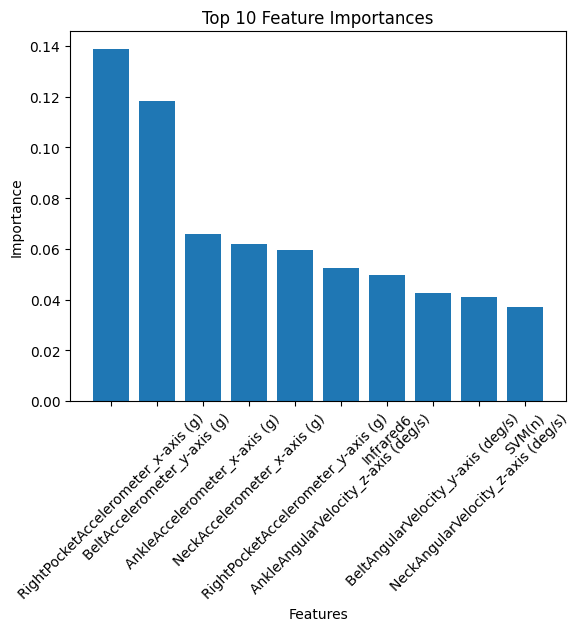

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=['Activity'])
y = df['Activity']
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, importances))
import matplotlib.pyplot as plt
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
top_features = dict(sorted_importances[:10])
top_feature_names = list(top_features.keys())
X_train_new = X_train[top_feature_names]
X_train = X_train_new
X_test_new = X_test[top_feature_names]
X_test = X_test_new
plt.bar(top_features.keys(), top_features.values())
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 0.9104477611940298

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.97      0.85      0.91        34

    accuracy                           0.91        67
   macro avg       0.92      0.91      0.91        67
weighted avg       0.92      0.91      0.91        67



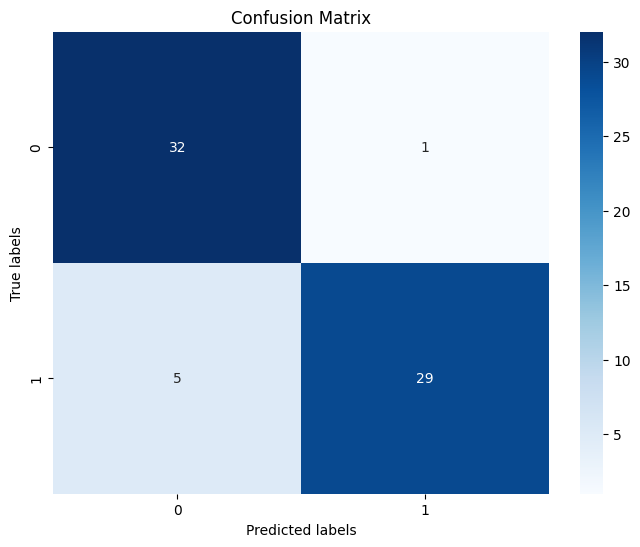

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your data into 'data' DataFrame

# Encode the target variable
label_encoder = LabelEncoder()
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Activity'])
y = df['Activity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)


Accuracy: 0.97


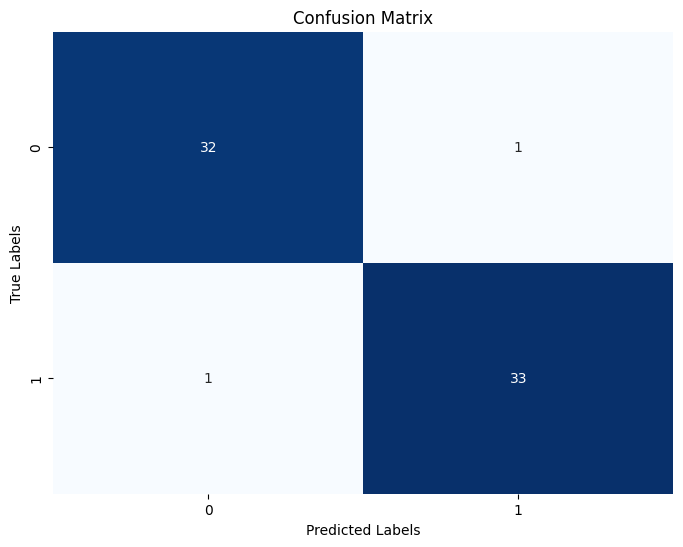

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Train an XGBoost classifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


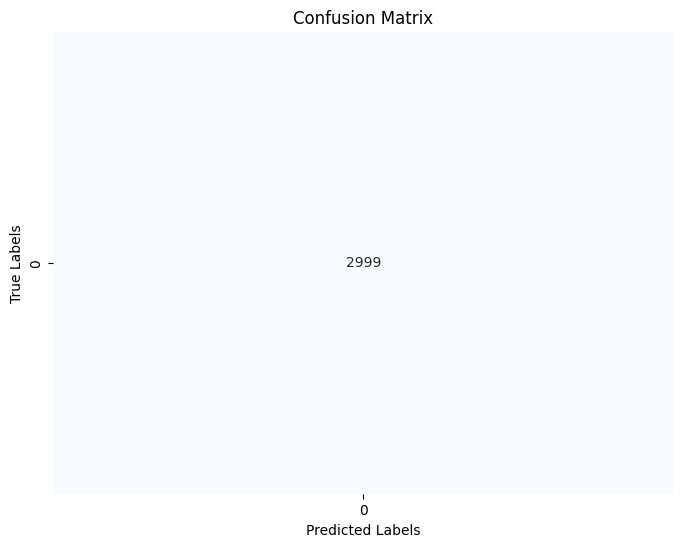

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#data = pd.read_csv('your_dataset.csv')

# Prepare the data
X = data.drop(columns=[ 'Activity'])

# Fit K-Means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Assign cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to binary labels
# Here, we'll assume that the majority of samples in each cluster correspond to the corresponding class
cluster_0_label = 1 if np.mean(data.iloc[cluster_labels == 0]['Activity'] == 'fall') > 0.5 else 0
cluster_1_label = 1 if np.mean(data.iloc[cluster_labels == 1]['Activity'] == 'fall') > 0.5 else 0

predicted_labels = np.where(cluster_labels == 0, cluster_0_label, cluster_1_label)

# True labels
true_labels = (data['Activity'] == 'fall').astype(int)

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9552238805970149

Confusion Matrix:
[[32  1]
 [ 2 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.97      0.94      0.96        34

    accuracy                           0.96        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.96      0.96      0.96        67

[1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1]
Accuracy: 0.96


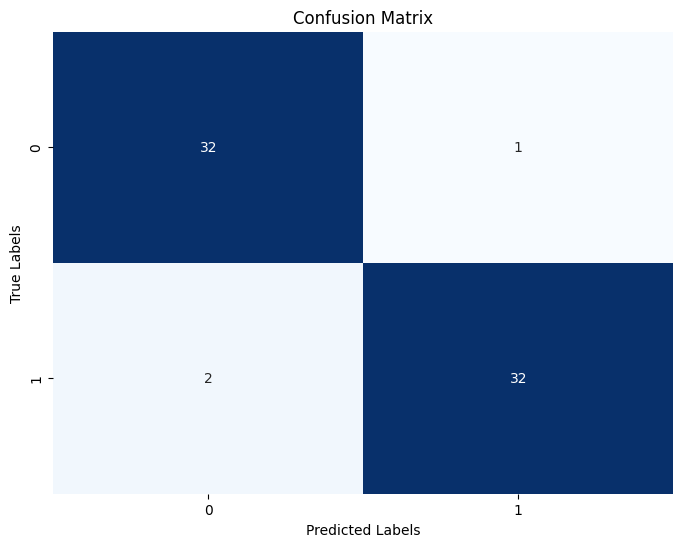

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train SVM classifier on selected features
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.9552238805970149

Confusion Matrix:
[[30  3]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.92      1.00      0.96        34

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.96        67
weighted avg       0.96      0.96      0.96        67



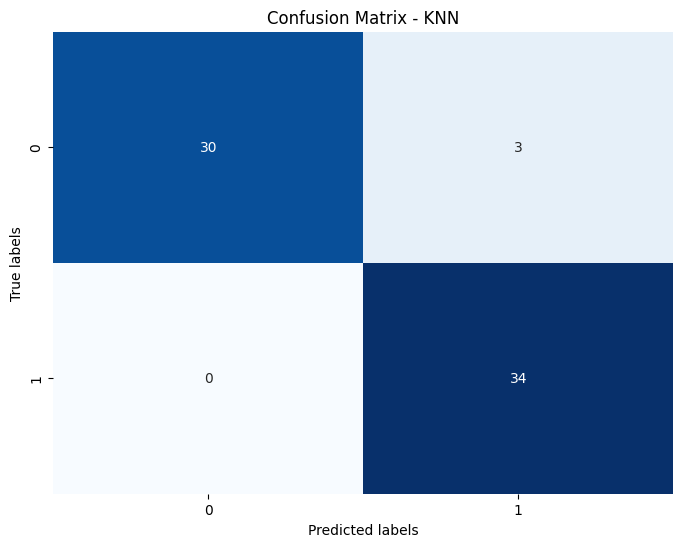

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Train KNN classifier on selected features
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

Accuracy: 0.9253731343283582

Confusion Matrix:
[[33  0]
 [ 5 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.85      0.92        34

    accuracy                           0.93        67
   macro avg       0.93      0.93      0.93        67
weighted avg       0.94      0.93      0.93        67



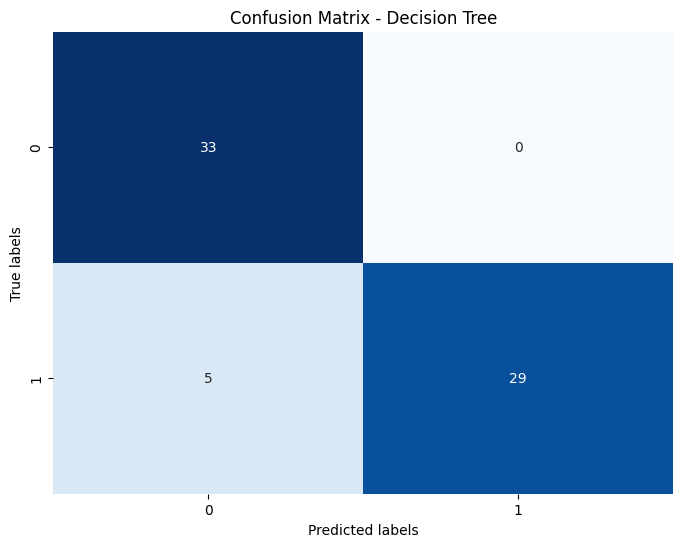

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Train Decision Tree classifier on selected features
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Accuracy: 0.9850746268656716

Confusion Matrix:
[[32  1]
 [ 0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.99        34

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.99        67
weighted avg       0.99      0.99      0.99        67



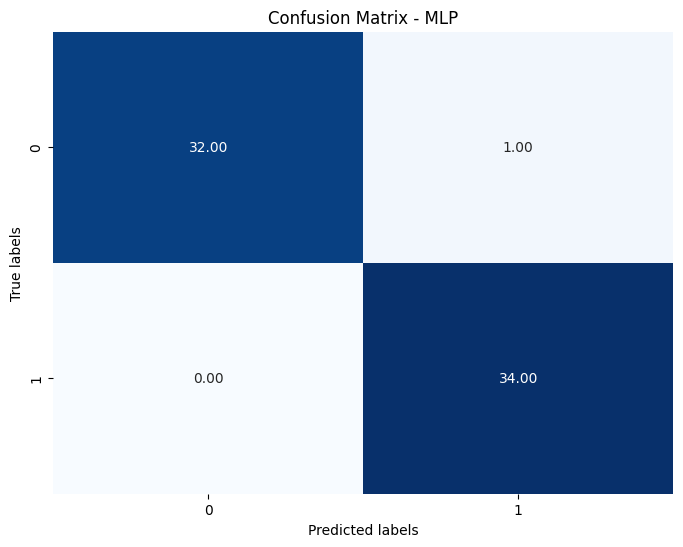

True Positives (TP): 34


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train MLP classifier on selected features
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# You can adjust the parameters such as hidden_layer_sizes and max_iter as needed
mlp_classifier.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - MLP')
plt.show()

cm = confusion_matrix(y_test, y_pred)

# Access true positives (TP)
tp = cm[1, 1]  # For binary classification, where "1" is the positive class
print("True Positives (TP):", tp)
